In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes

In [33]:
df=pd.read_csv('./diabetes_prediction_dataset.csv',encoding="latin-1")
#note dataset the label (ham (legitimate) or spam) 
df.head(5)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<h>KEY FINDING</h>
1. Age: The dataset contains a wide range of ages, with a higher concentration of older adults.</br>
2. Gender: The majority of individuals in the dataset are females, followed by males and others.</br>
3. BMI: The distribution of BMI shows that a significant portion of individuals fall into the overweight and obese categories.</br>
4. Hypertension and Heart Disease: There are individuals with hypertension and heart disease in the dataset, which are associated with an increased </br>risk of diabetes.</br>
5. Smoking History: The dataset includes information on smoking history, which can be a risk factor for diabetes.</br>
6. HbA1c Level and Blood Glucose Level: Higher levels of HbA1c and blood glucose indicate a greater risk of diabetes.</br>

<h>EXPLORE DATA</h>

In [5]:
df.info() #show information feature data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Shape of the Dataset
df.shape

(100000, 9)

In [7]:
# Check Null Values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# Check Duplicate Values
df.duplicated().sum()

3854

In [9]:
# Drop Duplicates
df = df.drop_duplicates(keep="first") #keep data appeared for the first time
df.shape

(96146, 9)

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


# NOTE 
Column Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the presence of no diabetes

In [12]:
# diabetes & no_diabetes Counts
df["diabetes"].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

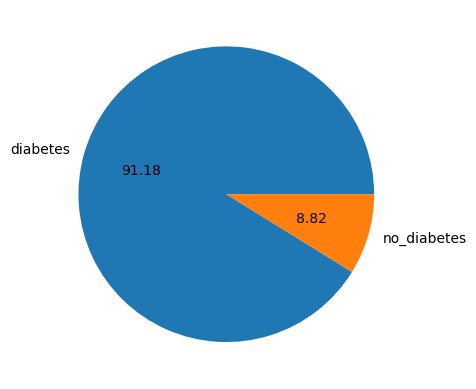

In [14]:
plt.pie(df["diabetes"].value_counts(),autopct = "%.2f", labels=['diabetes','no_diabetes'])
plt.show()

In [19]:
numeric_col=[]
non_numeric_col=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]): #kiểm tra xem cột hiện tại có chứa dữ liệu số không
        if(df[column].nunique()<5):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


In [16]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()

 Univariate analysis for gender column:


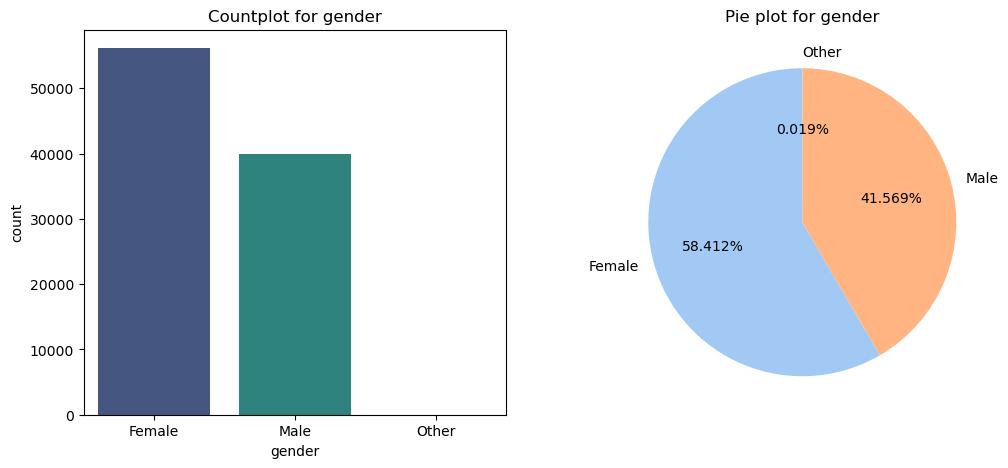

 Univariate analysis for hypertension column:


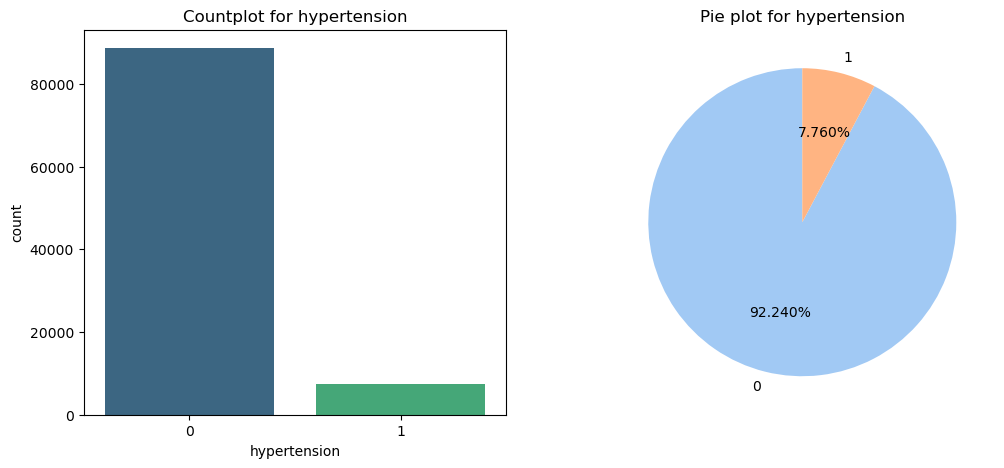

 Univariate analysis for heart_disease column:


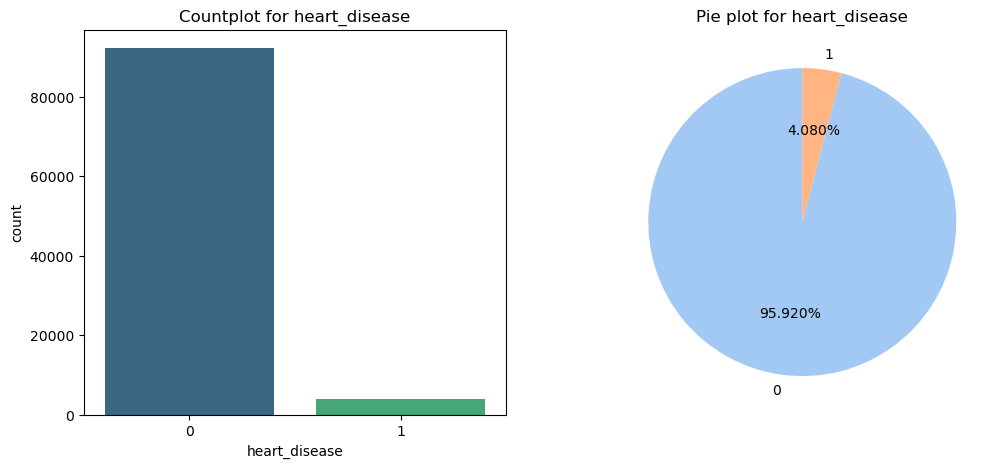

 Univariate analysis for smoking_history column:


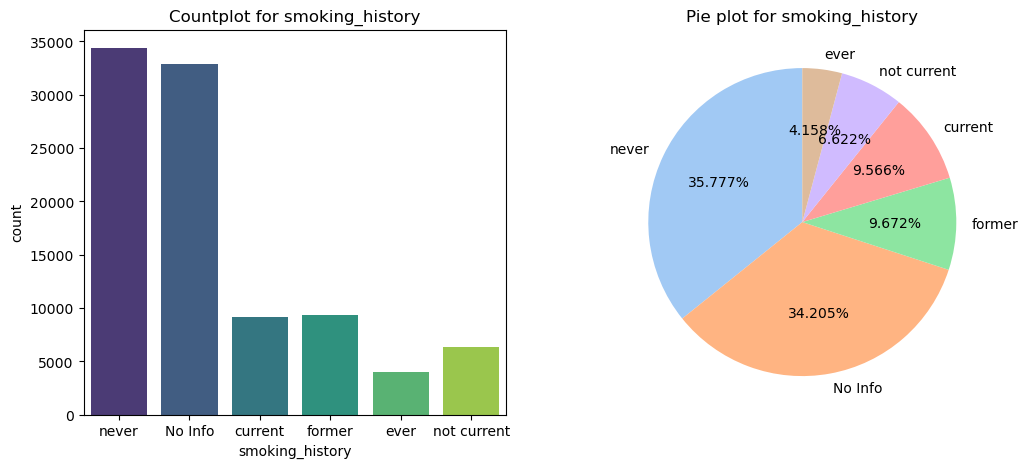

 Univariate analysis for diabetes column:


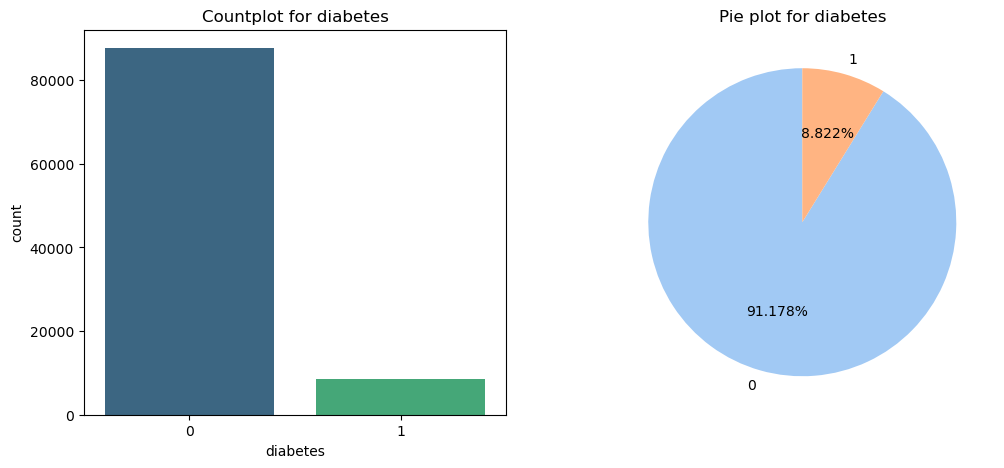

In [17]:
for col in non_numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

In [42]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sample_size = 30000  
sample_df = df.sample(n=sample_size, random_state=42) 
for col in non_numeric_col:
    sample_df[col]=le.fit_transform(sample_df[col])
sample_df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75721,0,13.0,0,0,0,20.82,5.8,126,0
80184,0,3.0,0,0,0,21.00,5.0,145,0
19864,1,63.0,0,0,3,25.32,3.5,200,0
76699,0,2.0,0,0,4,17.43,6.1,126,0
92991,0,33.0,0,0,5,40.08,6.2,200,1
...,...,...,...,...,...,...,...,...,...
42648,1,51.0,0,0,1,24.68,7.0,200,1
86306,1,28.0,0,0,4,18.94,6.0,90,0
45466,0,80.0,0,1,4,33.03,6.6,100,0
63724,0,80.0,0,0,0,27.32,6.2,200,0


In [44]:
x = sample_df.drop('diabetes', axis=1)
y = sample_df['diabetes']

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred = model_svm.predict(X_test)

In [47]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8225
           1       0.90      0.58      0.70       775

    accuracy                           0.96      9000
   macro avg       0.93      0.79      0.84      9000
weighted avg       0.96      0.96      0.95      9000

